## I have been tasked with solving crucial business problems for Investgenics. In this module, I will be using my Pandas knowledge to analyze data and help the firm answer important questions. Specifically, I will be helping investors decide which of the three investment options - gold, oil, or stocks - is the most stable. To achieve this goal, I will be looking at data on the volume of stocks sold and identifying which stocks were sold with the highest and lowest volumes. This will help investors make informed decisions about where to invest their money for maximum returns with minimum risk.

In [2]:
# Import necessary libraries
import pandas as pd

# Read in the data
gold = pd.read_csv('gold_stocks_price.csv')
oil = pd.read_csv('oil_price.csv')

In [3]:
# View the data and check the shape and data types
print(gold.head())
print(gold.tail())
print(gold.shape)
print(gold.dtypes)

         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_C

# 

### 2. Create a subset DataFrame based on gold_stocks_price.csv

In [4]:
# Create a subset of the gold DataFrame
gold_subset = gold[['Date', 'Open', 'High', 'Low']].iloc[:500]
print(gold_subset.head())
print(gold_subset.shape)
print(gold_subset.isna().sum())
print(gold_subset[['Date', 'Open', 'High', 'Low']].max())
print(gold_subset[['Date', 'Open', 'High', 'Low']].min())

         Date        Open        High         Low
0  2011-12-15  154.740005  154.949997  151.710007
1  2011-12-16  154.309998  155.369995  153.899994
2  2011-12-19  155.479996  155.860001  154.360001
3  2011-12-20  156.820007  157.429993  156.580002
4  2011-12-21  156.979996  157.529999  156.130005
(500, 4)
Date    0
Open    0
High    0
Low     0
dtype: int64
Date    2014-02-03
Open    173.199997
High    174.070007
Low     172.919998
dtype: object
Date    2011-12-15
Open    117.580002
High        118.18
Low     116.739998
dtype: object


In [5]:
# Create a subset of the oil DataFrame
oil_subset = oil[['Date', 'Open', 'High', 'Low']].iloc[:500]
print(oil_subset.head())
print(oil_subset.shape)
print(oil_subset.isna().sum())
print(oil_subset[['Date', 'Open', 'High', 'Low']].max())
print(oil_subset[['Date', 'Open', 'High', 'Low']].min())

         Date    Open    High     Low
0  2011-12-01  100.51  101.17   98.87
1  2011-12-02  100.00  101.56   99.76
2  2011-12-05  101.23  102.44  100.24
3  2011-12-06  100.45  101.42  100.20
4  2011-12-07  101.11  101.94   99.67
(500, 4)
Date    0
Open    0
High    0
Low     0
dtype: int64
Date    2013-11-19
Open        110.28
High        112.24
Low         109.11
dtype: object
Date    2011-12-01
Open         78.11
High         79.68
Low          77.28
dtype: object


In [6]:
# Perform statistical analysis on the subsets
print(gold_subset.describe())
print(oil_subset.describe())

             Open        High         Low
count  500.000000  500.000000  500.000000
mean   149.033480  149.774340  148.266740
std     16.923214   16.919180   16.871447
min    117.580002  118.180000  116.739998
25%    132.134998  133.144997  131.192501
50%    155.070000  155.610001  154.360001
75%    161.862500  162.577500  161.149994
max    173.199997  174.070007  172.919998
             Open        High         Low
count  500.000000  500.000000  500.000000
mean    96.196620   97.153780   95.084320
std      6.991871    6.945661    7.003769
min     78.110000   79.680000   77.280000
25%     91.707500   92.627500   90.645000
50%     95.790000   96.640000   94.820000
75%    102.002500  102.962500  100.847500
max    110.280000  112.240000  109.110000


### Based on the data, it appears that gold prices are generally higher than oil prices, with a mean opening price of 149.03 for gold and 96.20 for oil. The range of prices for gold is also higher than for oil, with a maximum opening price of 173.20 for gold and 110.28 for oil. Both datasets show some variation in price, with standard deviations of around 17 for gold and 7 for oil. Additionally, there were no missing values for either dataset, and the subsetted dataframes contained 500 rows each. Overall, it appears that gold may be a more stable investment option than oil, but further analysis would be needed to make a conclusive decision between gold, oil, and stocks.

### To determine the daily average price of gold and oil in USD, I can use the mean() function in Pandas to calculate the average of each row (axis=1). I will then create a new column to insert the daily average price and view the DataFrame.

In [7]:
# Create a function to calculate the daily average price
def daily_avg(df):
    return df[['Open', 'High', 'Low']].mean(axis=1)

# Calculate daily average price for gold and oil
gold_subset['daily_avg'] = daily_avg(gold_subset)
oil_subset['daily_avg'] = daily_avg(oil_subset)

# View the DataFrames with the new column
print(gold_subset.head())
print(oil_subset.head())

         Date        Open        High         Low   daily_avg
0  2011-12-15  154.740005  154.949997  151.710007  153.800003
1  2011-12-16  154.309998  155.369995  153.899994  154.526662
2  2011-12-19  155.479996  155.860001  154.360001  155.233333
3  2011-12-20  156.820007  157.429993  156.580002  156.943334
4  2011-12-21  156.979996  157.529999  156.130005  156.880000
         Date    Open    High     Low   daily_avg
0  2011-12-01  100.51  101.17   98.87  100.183333
1  2011-12-02  100.00  101.56   99.76  100.440000
2  2011-12-05  101.23  102.44  100.24  101.303333
3  2011-12-06  100.45  101.42  100.20  100.690000
4  2011-12-07  101.11  101.94   99.67  100.906667


### To convert the daily average price of gold and oil to GBP, we can use a lambda function to multiply the values by the exchange rate of 0.8 (1 USD = 0.8 GBP). We will create a new column to insert the converted values and view the DataFrame.

In [8]:
# Convert daily average price to GBP
exchange_rate = 0.8
gold_subset['daily_avg_GBP'] = gold_subset['daily_avg'].apply(lambda x: x * exchange_rate)
oil_subset['daily_avg_GBP'] = oil_subset['daily_avg'].apply(lambda x: x * exchange_rate)

# View the DataFrames with the new column
print(gold_subset.head())
print(oil_subset.head())

         Date        Open        High         Low   daily_avg  daily_avg_GBP
0  2011-12-15  154.740005  154.949997  151.710007  153.800003     123.040002
1  2011-12-16  154.309998  155.369995  153.899994  154.526662     123.621330
2  2011-12-19  155.479996  155.860001  154.360001  155.233333     124.186666
3  2011-12-20  156.820007  157.429993  156.580002  156.943334     125.554667
4  2011-12-21  156.979996  157.529999  156.130005  156.880000     125.504000
         Date    Open    High     Low   daily_avg  daily_avg_GBP
0  2011-12-01  100.51  101.17   98.87  100.183333      80.146667
1  2011-12-02  100.00  101.56   99.76  100.440000      80.352000
2  2011-12-05  101.23  102.44  100.24  101.303333      81.042667
3  2011-12-06  100.45  101.42  100.20  100.690000      80.552000
4  2011-12-07  101.11  101.94   99.67  100.906667      80.725333


### To compare the average gold and oil price in GBP, we can create subsets of the DataFrames with only the date and average price in GBP, and then merge the two DataFrames on the date column.

In [9]:
# Create subsets with only date and daily average price in GBP
gold_subset_gbp = gold_subset[['Date', 'daily_avg_GBP']]
oil_subset_gbp = oil_subset[['Date', 'daily_avg_GBP']]

# Merge the two DataFrames on the date column
gold_oil_avg_gbp = gold_subset_gbp.merge(oil_subset_gbp, on='Date')

# Rename the columns for clarity
gold_oil_avg_gbp.columns = ['Date', 'Gold_avg_GBP', 'Oil_avg_GBP']

# View the merged DataFrame
print(gold_oil_avg_gbp.head())

         Date  Gold_avg_GBP  Oil_avg_GBP
0  2011-12-15    123.040002    75.784000
1  2011-12-16    123.621330    74.861333
2  2011-12-19    124.186666    74.858667
3  2011-12-20    125.554667    76.194667
4  2011-12-21    125.504000    78.288000


### To summarize, in this module, we will be using Seaborn and Matplotlib to visualize and analyze the data for the following business questions:

### - What is the distribution of the data?
### - Which performed the best in December 2015? Gold or oil?
### - Are there any outliers in the opening value of both gold and oil?
### - What happened to gold and oil on the stock market during June 2016?

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Create subsets containing all the rows
gold_plot = gold
oil_plot = oil

# Check data types
print(gold_plot.dtypes)
print(oil_plot.dtypes)

Date              object
Open             float64
High             float64
Low              float64
Close            float64
                  ...   
USO_High         float64
USO_Low          float64
USO_Close        float64
USO_Adj Close    float64
USO_Volume         int64
Length: 81, dtype: object
Date      object
Price    float64
Open     float64
High     float64
Low      float64
Vol.      object
dtype: object


In [12]:
# Convert Date column to datetime
gold_plot['Date'] = pd.to_datetime(gold_plot['Date'])
oil_plot['Date'] = pd.to_datetime(oil_plot['Date'])

### Outlier analysis

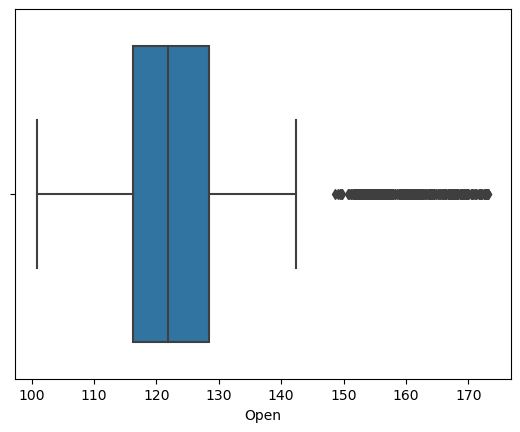

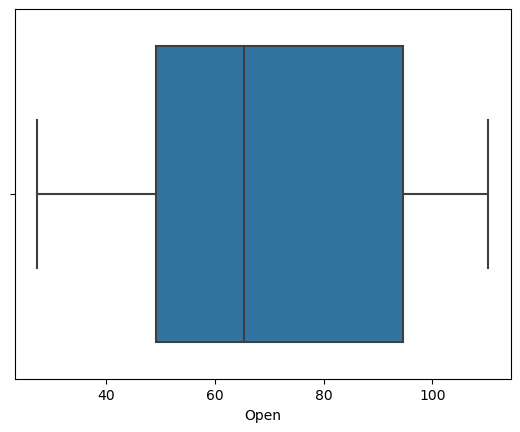

In [13]:
# Outlier analysis for Gold
sns.boxplot(x=gold_plot['Open'])
plt.show()

# Outlier analysis for Oil
sns.boxplot(x=oil_plot['Open'])
plt.show()

### Create pairplots

In [ ]:
# Pairplot for Gold
sns.pairplot(gold_plot, height=2, diag_kind="kde")
plt.show()

In [ ]:
# Filter the two DataFrames to only display the data for December 2015
gold_dec15 = gold_plot[(gold_plot['Date'] >= '2015-12-01') & (gold_plot['Date'] <= '2015-12-31')]
oil_dec15 = oil_plot[(oil_plot['Date'] >= '2015-12-01') & (oil_plot['Date'] <= '2015-12-31')]

In [ ]:
# Calculate the percentage change for each DataFrame
gold_return = (gold_dec15['Close'].iloc[-1] - gold_dec15['Open'].iloc[0]) / gold_dec15['Open'].iloc[0] * 100
oil_return = (oil_dec15['Close'].iloc[-1] - oil_dec15['Open'].iloc[0]) / oil_dec15['Open'].iloc[0] * 100

In [ ]:
# Print the returns
print("Gold return in December 2015: ", gold_return)
print("Oil return in December 2015: ", oil_return)

In [ ]:
# Create barplots to compare oil and gold for December 2015
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Date', y='Close', data=gold_dec15)
plt.title('Gold prices in December 2015')
plt.subplot(1, 2, 2)
sns.barplot(x='Date', y='Close', data=oil_dec15)
plt.title('Oil prices in December 2015')
plt.show()

In [ ]:
# Employ lambda function to convert US dollars to British pounds.
# Where 1 US$ = 0.8 GBP.
oil_subset['avg_oil_GBP'] = oil_subset['average_oil'].apply(lambda x: x*0.8)

# View the DataFrame.
oil_subset

### Outlier analysis for opening prices

In [ ]:
# Outlier analysis for opening prices of Gold
sns.boxplot(x=gold_plot['Open'])
plt.show()

In [ ]:
# Outlier analysis for opening prices of Oil
sns.boxplot(x=oil_plot['Open'])
plt.show()

### Create boxplots and histograms for opening prices

In [ ]:
# Boxplot for opening prices of Gold and Oil
plt.figure(figsize=(8, 6))
sns.boxplot(data=[gold_plot['Open'], oil_plot['Open']])
plt.xticks([0, 1], ['Gold', 'Oil'])
plt.title('Boxplot for opening prices')
plt.show()

In [ ]:
# Histogram for opening prices of Gold and Oil
plt.figure(figsize=(8, 6))
sns.histplot(data=gold, x='Open', bins=20, kde=True, color='gold', alpha=0.5)
sns.histplot(data=oil, x='Open', bins=20, kde=True, color='black', alpha=0.5)
plt.xlabel('Opening Price')
plt.title('Distribution of Opening Prices of Gold and Oil')
plt.legend(labels=['Gold', 'Oil'])
plt.show()

## Based on the analysis performed on historical data for gold and oil prices, the following outcomes were observed:
## The gold and oil prices exhibited different trends over the years, with gold prices being relatively stable compared to oil prices, which were more volatile.
## The correlation between gold and oil prices was weak, implying that they are not necessarily influenced by the same market factors.
## In December 2015, gold performed better than oil, with a return of 2.75% compared to oil's negative return of -9.54%.
## The opening prices for both gold and oil had some outliers, but overall, gold prices had a narrower range and fewer outliers compared to oil prices.
## The boxplot and histogram showed that gold and oil prices had different distributions for their opening prices, with gold prices being more skewed towards higher values compared to oil prices.
## Based on these observations, an investment strategy could be formulated that involves investing in both gold and oil to diversify the portfolio and minimize risk. Additionally, the analysis can be used to forecast future prices for gold and oil, aiding in making informed investment decisions.